In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
#the usual suspects
import pandas as pd 
from datetime import datetime 
import re
import pandas as pd

from pair_trading.preproc import alph_settings as alph, alph_api_wrapper as wrap, threading, helper
import pair_trading.pairs_select as pt_select
print(dir())

['DBSCAN', 'In', 'MinMaxScaler', 'Out', 'PCA', 'StandardScaler', 'TSNE', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'adjusted', 'alph', 'cl_series', 'cm', 'cofi_df', 'cofi_path', 'coint', 'copy', 'data1', 'data2', 'datetime', 'df', 'df1', 'df2', 'exit', 'filters', 'function', 'get_ipython', 'helper', 'interval', 'intraday_path', 'json', 'name1', 'name2', 'np', 'output', 'p_vals', 'pair_coint', 'pairs', 'pd', 'plt', 'preprocessing', 'price_df', 'price_ev', 'price_path', 'price_pca', 'price_pca_df', 'pt_select', 'quit', 'raw_prices_df', 're', 'rp_path', 'settings', 'slice', 'sm', 'threading', 'ticker_lst', 'time', 'timestamp', 'ts', 'tsne_df', 'tsne_pca_results', 'urls', 'val', 'vol_df', 'vol_path', 'wrap']


In [19]:
_, price_path = helper.reader_paths(name = "price")
_, vol_path = helper.reader_paths(name = "vol")
_, cofi_path = helper.reader_paths(name = "cofi")
print(price_path, "\n", vol_path)

price_df = pd.read_csv(price_path).dropna()
price_df.set_index("0", inplace = True)
#display(price_df)
vol_df = pd.read_csv(vol_path).dropna()
vol_df.set_index("0", inplace = True)

cofi_df = pd.read_csv(cofi_path).dropna()
cofi_df.set_index("0", inplace = True)
#display(cofi_df)

c:\Users\ELIZABETH CHENG\source\repos\206_LOB\ML_pairs_trading\pair_trading/reader\raw_prices2023_04_0209_42_04.csv 
 c:\Users\ELIZABETH CHENG\source\repos\206_LOB\ML_pairs_trading\pair_trading/reader\vol_pca2023_03_3119_49_04.csv


DBSCAN(eps=0.7, min_samples=2, n_jobs=1)
Clusters formed: 36


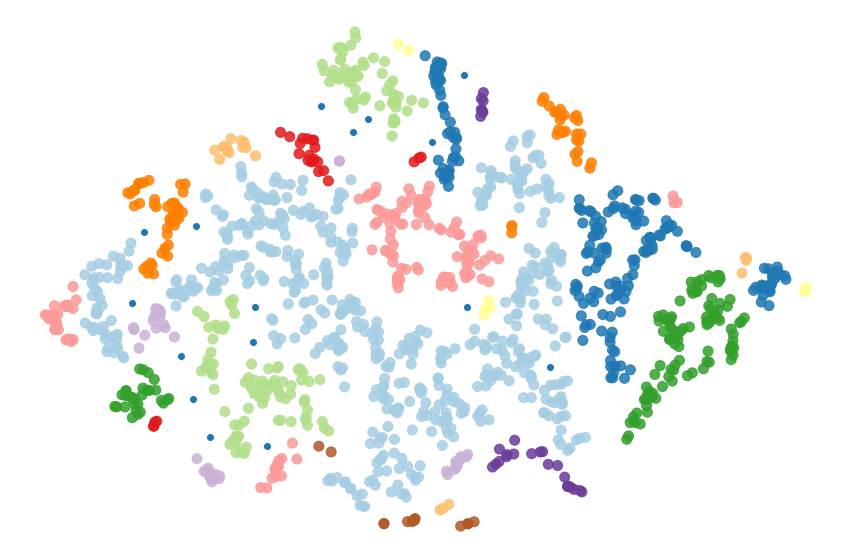

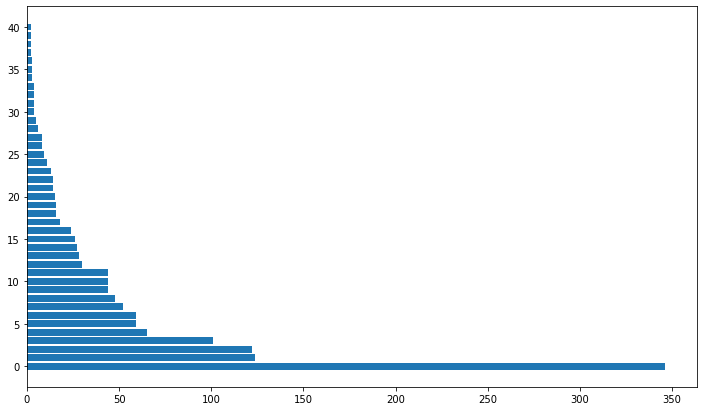

In [20]:
price_pca, price_pca_df, price_ev = pt_select.apply_pca(price_df, 50)
tsne_pca_results, tsne_df = pt_select.apply_tsne(price_pca)
cl_series = pt_select.dbscan_results(tsne_pca_results, price_df)

In [21]:
_, rp_path = helper.reader_paths(name = "raw_prices")
raw_prices_df = pd.read_csv(rp_path).T
raw_prices_df.columns = raw_prices_df.iloc[0]
raw_prices_df = raw_prices_df[1:]
display(raw_prices_df)

0,AHH,AXTA,USDP,OUT,EOG,MO,ORCL,RRX,PSX,SKY,...,BKI,SUP,CMG,GNW,NMR,BWA,BKE,RCL,PPL,ERJ
1,11.55,29.47,3.05,15.65,113.54,44.5,90.51,138.9,99.99,74.31,...,56.51,4.9,1672.17,4.98,3.76,48.21,34.83,64.72,27.55,16.32
2,11.53,29.23,3.0201,15.31,112.68,44.52,90.62,140.116934,100.28,72.86,...,56.38,5.05,1656.72,5.01,3.83,48.14,35.04,64.15,27.53,16.28
3,11.41,28.7,3.0101,15.08,110.41,44.36,89.85,137.42372,98.78,70.42,...,55.51,5.09,1652.9,4.96,3.81,47.67,34.44,61.87,27.09,15.87
4,11.20344,28.41,2.95,14.88,108.38,44.29,90.14,136.426233,96.23,67.95,...,55.25,5.29,1647.82,4.97,3.8,47.43,34.32,60.49,26.96,15.66
5,11.085405,28.1,2.91,15.18,105.49,43.97,88.01,132.825307,93.73,67.85,...,54.58,5.39,1624.25,4.75,3.75,47.38,34.74,60.85,26.78,15.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,9.83103,28.3,5.840671,16.171751,73.815862,42.976042,37.238544,56.108474,60.488664,10.140549,...,39.45,25.969816,397.48,3.7,4.239181,30.780415,14.44474,65.296842,25.471446,18.576486
1669,9.824018,28.0,5.964941,16.266238,74.345739,43.287368,36.968634,54.902029,60.657992,9.669352,...,39.34,25.755116,397.33,3.57,4.220506,30.340695,13.992501,64.657572,26.075512,18.419888
1670,9.859078,28.26,5.945822,16.426139,73.59576,43.287368,37.139577,55.076876,60.157704,9.914767,...,39.24,25.987708,398.22,3.54,4.220506,30.511199,13.707159,64.876751,26.17619,18.478612
1671,9.838042,28.27,5.702063,16.215361,72.894692,43.352228,36.968634,53.651871,59.226399,10.268165,...,39.21,25.951924,395.07,3.53,4.192494,30.250956,13.594099,63.799124,25.910113,18.22414


In [22]:
p_vals, pair_coint = pt_select.pairs_select(cl_series, raw_prices_df, 1, sf = 0.05)
print(p_vals, pair_coint)

[0.02648138249727855, 0.02121043656443195, 0.04547082680358792, 0.047150469104482326, 0.013822224078179868, 0.04363018535585913, 0.00849015337433361, 0.02142760386111206, 0.02519527748054877, 0.03150500972337738, 0.021663159928769177, 0.012341431176564298, 0.024606807955399334, 0.019484744923480984, 0.0002595046987688849, 0.0018785733200201832, 0.043837370766223356, 0.04116504969764782, 0.012826402276203915, 0.03843811134479936, 0.018121431924881793, 0.016914789070147637, 0.03225131123899152, 0.017318499850659107, 0.006816684671216016, 0.01544704070441337, 0.0036893121781692855, 0.00012465215348891377, 0.03077346850590696, 0.018152621056255053, 0.006387392752880241, 0.025365437393265584, 0.03508094998192194, 0.017638389141426642, 0.003936303217442119, 0.008072119246895961, 0.03702743645652226, 0.0094313758752239, 0.021170680983780554, 0.0008925671473091417, 0.01078928425645542, 0.04447382853918179, 0.002245542882167694, 0.01801149233715684, 0.0034600228209378005, 0.00767611549022935, 9

In [23]:
pairs = pt_select.get_tickers(p_vals, pair_coint)
print(pairs)

[('FRO', 'ELP'), ('DHT', 'ELP'), ('FRO', 'TAC'), ('GNE', 'EBR'), ('WIT', 'SOL')]


In [24]:
settings = alph(
    apikey = "MD27QTTVAK3AJBUQ", 
    site = "https://www.alphavantage.co/query?", 
    date_range = [datetime(2016, 8, 9), datetime(2023, 3, 30)]
    )

#url query inputs 
function = "TIME_SERIES_INTRADAY_EXTENDED"
ticker_lst = [pairs[0][0], pairs[0][1]]
interval = "60min"
slice = [[f"year{j}month{i}" for i in range(1, 13)] for j in range(1, 3)]
slice = slice[0] + slice[1]
output = "json"
adjusted = True
urls = wrap.intraday_url(settings, function, ticker_lst, interval, slice, output = output, adjusted = adjusted)

data1 = threading.thrd_ticker_slices(urls[ticker_lst[0]])
data2 = threading.thrd_ticker_slices(urls[ticker_lst[1]])

df1 = pd.DataFrame(data = data1, columns = ["time", "open", "high", "low", "close", "volume"])
df2 = pd.DataFrame(data = data2, columns = ["time", "open", "high", "low", "close", "volume"])

df1["time"] = pd.to_datetime(df1["time"])
df1 = df1.sort_values(by = ["time"])
df2["time"] = pd.to_datetime(df2["time"])
df2 = df2.sort_values(by = ["time"])

display(df1)
display(df2)

Total time elapsed: 2.3288614749908447 seconds
Total time elapsed: 2.173064947128296 seconds


,time,open,high,low,close,volume
4801,2021-04-12 05:00:00,6.573017875498955,6.600830362983436,6.498851242207007,6.498851242207007,5177
4800,2021-04-12 06:00:00,6.535934558852981,6.535934558852981,6.535934558852981,6.535934558852981,200
4799,2021-04-12 07:00:00,6.573017875498955,6.573017875498955,6.545205388014474,6.545205388014474,2448
4798,2021-04-12 08:00:00,6.545205388014474,6.554476217175968,6.498851242207007,6.517392900529994,9743
4797,2021-04-12 09:00:00,6.526663729691488,6.563747046337462,6.5081220713685,6.554476217175968,29074
...,...,...,...,...,...,...
4806,2023-03-31 14:00:00,16.395,16.485,16.38,16.455,106528
4805,2023-03-31 15:00:00,16.4563,16.4563,16.36,16.38,96606
4804,2023-03-31 16:00:00,16.385,16.585,16.37,16.56,460141
4803,2023-03-31 17:00:00,16.56,16.56,16.56,16.56,49594


,time,open,high,low,close,volume
3167,2021-04-12 09:00:00,4.543268808258694,4.543268808258694,4.543268808258694,4.543268808258694,21
3166,2021-04-12 10:00:00,4.543268808258694,4.66605985713055,4.46140810901079,4.522803633446718,297407
3165,2021-04-12 11:00:00,4.522803633446718,4.584199157882646,4.502338458634743,4.543268808258694,293516
3164,2021-04-12 12:00:00,4.543268808258694,4.584199157882646,4.502338458634743,4.543268808258694,187891
3163,2021-04-12 13:00:00,4.502338458634743,4.543268808258694,4.4818732838227655,4.522803633446718,205208
...,...,...,...,...,...,...
2787,2023-03-31 13:00:00,6.71,6.7164,6.69,6.705,13044
2786,2023-03-31 14:00:00,6.7,6.7,6.635,6.65,13220
2785,2023-03-31 15:00:00,6.645,6.68,6.645,6.67,17919
2784,2023-03-31 16:00:00,6.675,6.72,6.64,6.72,120588


In [25]:
intraday_path = helper.writer_path()
timestamp = re.sub("-", "_", str(datetime.today().date())) + re.sub(":", "_", str(datetime.today().time()))[:-7]
name1 = f"intraday_{ticker_lst[0]}"
name2 = f"intraday_{ticker_lst[1]}"
df1.to_csv(intraday_path+name1+timestamp+".csv")
df2.to_csv(intraday_path+name2+timestamp+".csv")